<a href="https://colab.research.google.com/github/mananjain02/disaster_or_not/blob/main/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
import tensorflow as tf

In [9]:
from helper_functions import unzip_data, create_tensorboard_callback, compare_historys

In [ ]:
unzip_data('/content/nlp_getting_started.zip')

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


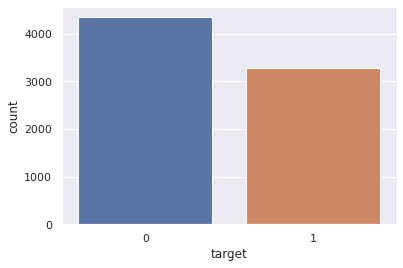

In [ ]:
sns.countplot(x='target', data=data)

In [ ]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
import random
i = random.choice(range(len(data)))
data['text'][i], data['target'][i]

('@TanSlash waiting for an ambulance', 0)

In [ ]:
data_shuffled = data.sample(frac=1, random_state=42)

In [ ]:
data_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
data_shuffled['target'].shape, data_shuffled['text'].shape

((7613,), (7613,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.asarray(data_shuffled['text']), np.asarray(data_shuffled['target']), test_size=.2, random_state=42)

In [ ]:
x_train, y_train

(array(['Detonation fashionable mountaineering electronic watch water-resistant couples leisure tab\x89Û_ http://t.co/E61x9Y65QD http://t.co/OVLET0gDqm',
        "Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo",
        'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM',
        ...,
        'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
        "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
        "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
       dtype=object), array([0, 1, 1, ..., 1, 1, 0]))

In [ ]:
x_train

array(['Detonation fashionable mountaineering electronic watch water-resistant couples leisure tab\x89Û_ http://t.co/E61x9Y65QD http://t.co/OVLET0gDqm',
       "Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo",
       'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vector = TextVectorization(max_tokens = None,
                                standardize = "lower_and_strip_punctuation",
                                split = "whitespace",
                                ngrams=None,
                                output_mode="int",
                                output_sequence_length=None,
                                pad_to_max_tokens=False,
                                vocabulary=None)

In [ ]:
len(x_train[1].split())

15

In [ ]:
round(sum([len(i.split()) for i in x_train])/len(x_train))

15

In [ ]:
vectorizer = TextVectorization(max_tokens=10000,
                               output_mode='int',
                               output_sequence_length=15)

In [ ]:
vectorizer.adapt(x_train)

In [ ]:
text = "there is a flood hmmm near my house."
vectorizer([text])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 75,   9,   3, 229,   1, 228,  13, 340,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
import random
randomtext = random.choice(x_train)
print(f"sentence: {randomtext} \n token: {vectorizer([randomtext])}")

sentence: #DU19 who gon get in this rap battle with me 
 token: [[   1   63 5093   50    4   19 4391  424   14   32    0    0    0    0
     0]]


In [ ]:
vectorizer.get_vocabulary()[-5:]

['minded', 'mindblowing', 'milne', 'milledgeville', 'millcityio']

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim=10000,
                                      output_dim=128,
                                      input_length=15)
embedding

In [ ]:
random_sentence = random.choice(x_train)
embed = embedding(vectorizer([random_sentence]))

In [ ]:
embed[0][0], random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04827925, -0.04916226, -0.0361478 , -0.02583879,  0.00236101,
        -0.0237398 ,  0.04477645, -0.00322326, -0.02275912, -0.01003336,
         0.00314902, -0.04856696,  0.01071942,  0.01296001,  0.01970312,
         0.03661085,  0.0401221 ,  0.02084062,  0.02088329,  0.04118999,
         0.00917331,  0.04220584,  0.03438776,  0.01863719,  0.00537271,
         0.00168362, -0.0068216 ,  0.04012569,  0.04223061,  0.000763  ,
        -0.03555216, -0.044532  , -0.04435163,  0.03676864, -0.00326433,
        -0.00205901, -0.03372165, -0.0236302 , -0.00760344, -0.01058042,
         0.01405213, -0.03489249,  0.01292027, -0.03098271,  0.00338181,
         0.03175927,  0.03840638, -0.03399738,  0.03563145,  0.00442259,
        -0.03055375, -0.0050601 , -0.04674547,  0.03280604, -0.03332664,
        -0.02820609, -0.00974796,  0.03443123, -0.01494907, -0.03010033,
        -0.04766506,  0.01633294, -0.04448117, -0.00646234,  0.0499506 ,
  

# Implementing in sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("vecto", TfidfVectorizer()),
                    ("nb", MultinomialNB())
])

In [ ]:
x_train.shape, y_train.shape

((6090,), (6090,))

In [ ]:
model_0.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vecto',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
model_0.score(x_test, y_test)

0.799080761654629

In [ ]:
preds = model_0.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, preds)

In [ ]:
cm

array([[803,  55],
       [251, 414]])

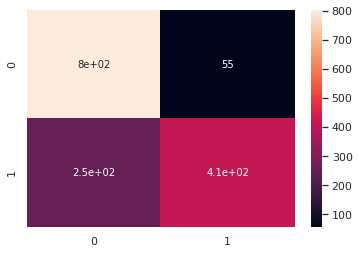

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       858
           1       0.88      0.62      0.73       665

    accuracy                           0.80      1523
   macro avg       0.82      0.78      0.79      1523
weighted avg       0.81      0.80      0.79      1523



# DL model for text

In [ ]:
from helper_functions import create_tensorboard_callback

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())

In [ ]:
history_model_1 = model_1.fit(x_train, y_train,
                              epochs=5,
                              validation_data=(x_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="tensorboard",
                                                                     experiment_name="model_1")])

Saving TensorBoard log files to: tensorboard/model_1/20210803-132325
Epoch 1/5
191/191 [==============================] - 7s 18ms/step - loss: 0.6216 - accuracy: 0.6813 - val_loss: 0.5485 - val_accuracy: 0.7492
Epoch 2/5
191/191 [==============================] - 3s 14ms/step - loss: 0.4522 - accuracy: 0.8128 - val_loss: 0.4754 - val_accuracy: 0.7886
Epoch 3/5
191/191 [==============================] - 3s 14ms/step - loss: 0.3514 - accuracy: 0.8616 - val_loss: 0.4614 - val_accuracy: 0.7899
Epoch 4/5
191/191 [==============================] - 3s 14ms/step - loss: 0.2851 - accuracy: 0.8901 - val_loss: 0.4637 - val_accuracy: 0.7905
Epoch 5/5
191/191 [==============================] - 3s 14ms/step - loss: 0.2352 - accuracy: 0.9149 - val_loss: 0.4791 - val_accuracy: 0.7892


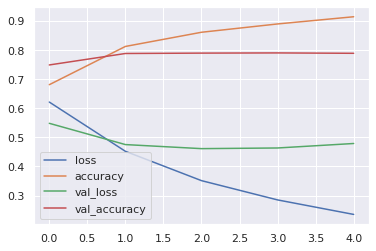

In [ ]:
pd.DataFrame(history_model_1.history).plot()

In [ ]:
model_1.evaluate(x_test, y_test)

48/48 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7892


[0.479086697101593, 0.7892317771911621]

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred_1 = model_1.predict(x_test)

In [ ]:
x_test[4]

'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov'

In [ ]:
y_test.shape

(1523,)

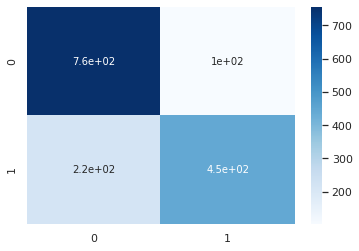

In [ ]:
sns.heatmap(confusion_matrix(y_test, tf.squeeze(pred_1.round())), annot=True, cmap='Blues')

In [ ]:
print(classification_report(y_test, tf.squeeze(pred_1.round())))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       858
           1       0.81      0.67      0.74       665

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



In [ ]:
# embed_layer = model_1.get_layer("embedding").get_weights()[0]
# embed_layer

In [ ]:
# import io
# vocab = vectorizer.get_vocabulary()
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_layer[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [ ]:
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

In [ ]:
# len(vectorizer.get_vocabulary())

In [ ]:
# vector = pd.read_csv("/content/vectors.tsv",
#                      sep='\t')
# metadata = pd.read_csv("/content/metadata.tsv",
#                      sep='\t')

In [ ]:
# vector.shape, metadata.shape

# Model_2: LSTM

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = vectorizer(inputs)
x = embedding(x)
# x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
# x = layers.Dense(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs)
model_2.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

In [ ]:
history_model_2 = model_2.fit(x_train, y_train,
                              epochs=5,
                              validation_data=(x_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="tensorboard",
                                                                     experiment_name="model_2")])

Saving TensorBoard log files to: tensorboard/model_2/20210803-132348
Epoch 1/5
191/191 [==============================] - 9s 23ms/step - loss: 0.2444 - accuracy: 0.8959 - val_loss: 0.5812 - val_accuracy: 0.7919
Epoch 2/5
191/191 [==============================] - 3s 17ms/step - loss: 0.1461 - accuracy: 0.9452 - val_loss: 0.6647 - val_accuracy: 0.7866
Epoch 3/5
191/191 [==============================] - 3s 18ms/step - loss: 0.1182 - accuracy: 0.9547 - val_loss: 0.6265 - val_accuracy: 0.7722
Epoch 4/5
191/191 [==============================] - 3s 17ms/step - loss: 0.0990 - accuracy: 0.9644 - val_loss: 0.7268 - val_accuracy: 0.7774
Epoch 5/5
191/191 [==============================] - 3s 17ms/step - loss: 0.0825 - accuracy: 0.9696 - val_loss: 0.7438 - val_accuracy: 0.7702


In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(x_test).round()

In [ ]:
model_2_preds

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_test, model_2_preds)
cm

array([[691, 167],
       [183, 482]])

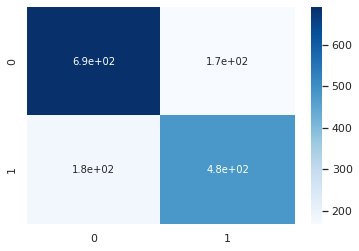

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
print(classification_report(y_test, model_2_preds))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       858
           1       0.74      0.72      0.73       665

    accuracy                           0.77      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.77      0.77      0.77      1523



# Model_3

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = vectorizer(inputs)
x = embedding(x)
x = layers.GRU(16, return_sequences=True)(x)
# x = layers.LSTM(16, return_sequences=True)(x)
x = layers.GRU(16)(x)
# x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)
model_3.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

In [ ]:
history_model_3 = model_3.fit(x_train, y_train,
                              epochs=5,
                              validation_data=(x_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="tensorboard",
                                                                     experiment_name="model_3")])

Saving TensorBoard log files to: tensorboard/model_3/20210803-132413
Epoch 1/5
191/191 [==============================] - 7s 24ms/step - loss: 0.2097 - accuracy: 0.9250 - val_loss: 0.6965 - val_accuracy: 0.7833
Epoch 2/5
191/191 [==============================] - 4s 20ms/step - loss: 0.0889 - accuracy: 0.9690 - val_loss: 0.7332 - val_accuracy: 0.7827
Epoch 3/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0728 - accuracy: 0.9764 - val_loss: 0.7624 - val_accuracy: 0.7787
Epoch 4/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0652 - accuracy: 0.9765 - val_loss: 0.8431 - val_accuracy: 0.7630
Epoch 5/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0602 - accuracy: 0.9775 - val_loss: 0.8169 - val_accuracy: 0.7735


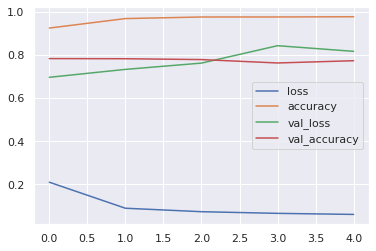

In [ ]:
pd.DataFrame(history_model_3.history).plot()

# Model_4

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(16, return_sequences=True)(x)
# x = layers.LSTM(16)(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
# x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs)
model_4.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam())

In [ ]:
history_model_4 = model_4.fit(x_train, y_train,
                              epochs=5,
                              validation_data=(x_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="tensorboard",
                                                                     experiment_name="model_4")])

Saving TensorBoard log files to: tensorboard/model_4/20210803-132436
Epoch 1/5
191/191 [==============================] - 12s 34ms/step - loss: 0.0922 - accuracy: 0.9737 - val_loss: 0.8425 - val_accuracy: 0.7663
Epoch 2/5
191/191 [==============================] - 4s 23ms/step - loss: 0.0567 - accuracy: 0.9788 - val_loss: 1.0747 - val_accuracy: 0.7735
Epoch 3/5
191/191 [==============================] - 4s 23ms/step - loss: 0.0486 - accuracy: 0.9801 - val_loss: 1.0250 - val_accuracy: 0.7623
Epoch 4/5
191/191 [==============================] - 4s 22ms/step - loss: 0.0414 - accuracy: 0.9821 - val_loss: 1.2384 - val_accuracy: 0.7722
Epoch 5/5
191/191 [==============================] - 4s 22ms/step - loss: 0.0378 - accuracy: 0.9826 - val_loss: 1.5500 - val_accuracy: 0.7676


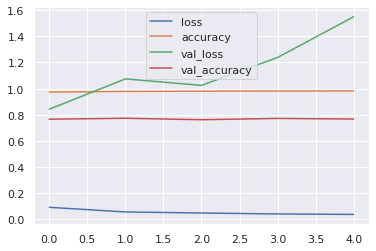

In [ ]:
 pd.DataFrame(history_model_4.history).plot()

# Model_4

In [ ]:
from tensorflow.keras import layers
conv = layers.Conv1D(filters=32,
                        kernel_size=5,
                        strides=1,
                        padding="valid",
                        activation='relu')
maxpool = layers.GlobalMaxPool1D()

In [ ]:
embedding_text = embedding(vectorizer(["This is manan jain"]))
conv_output = conv(embedding_text)
maxpool_output = maxpool(conv_output)

embedding_text.shape, conv_output.shape, maxpool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
inputs = layers.Input(shape=(1, ), dtype=tf.string)
x = vectorizer(inputs)
x = embedding(x)
x = conv(x)
x = maxpool(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs)

model_5.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [ ]:
history_model_5 = model_5.fit(x_train, y_train,
                              epochs = 5,
                              validation_data=(x_test, y_test),
                              callbacks = [create_tensorboard_callback("tensorboard",
                                                                       "model_5")])

Saving TensorBoard log files to: tensorboard/model_5/20210803-132547
Epoch 1/5
191/191 [==============================] - 6s 21ms/step - loss: 0.1278 - accuracy: 0.9660 - val_loss: 0.8492 - val_accuracy: 0.7807
Epoch 2/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0653 - accuracy: 0.9765 - val_loss: 0.9889 - val_accuracy: 0.7538
Epoch 3/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0532 - accuracy: 0.9780 - val_loss: 1.0720 - val_accuracy: 0.7597
Epoch 4/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0484 - accuracy: 0.9800 - val_loss: 1.1122 - val_accuracy: 0.7564
Epoch 5/5
191/191 [==============================] - 3s 15ms/step - loss: 0.0465 - accuracy: 0.9806 - val_loss: 1.1414 - val_accuracy: 0.7531


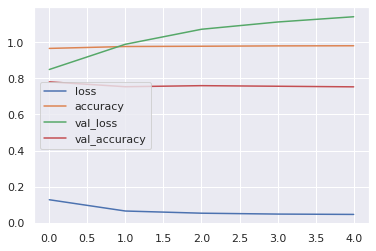

In [ ]:
pd.DataFrame(history_model_5.history).plot()

# Model_6

In [ ]:
import tensorflow_hub as hub
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                       input_shape=[],
                       dtype=tf.string)

In [ ]:
embedded = embed(["Hi I am Manan"])
embedded[0][:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 0.00391947, -0.03653914,  0.0520271 , -0.04217998,  0.07906567,
        0.07751808,  0.01906874, -0.00159734,  0.05766651,  0.02855617],
      dtype=float32)>

In [ ]:
# inputs = layers.Input(shape=(1,), dtype=tf.string)
# # x = vectorizer(inputs)
# x = embed(inputs)
# outputs = layers.Dense(1, activation="sigmoid")(x)
# model_6 = tf.keras.Model(inputs, outputs)

model_6 = tf.keras.models.Sequential()
model_6.add(embed)
model_6.add(tf.keras.layers.Dense(256, activation="relu"))
model_6.add(tf.keras.layers.Dense(256, activation="relu"))
model_6.add(tf.keras.layers.Dense(64, activation="relu"))
model_6.add(tf.keras.layers.Dense(64, activation="relu"))
model_6.add(tf.keras.layers.Dense(32, activation="relu"))
model_6.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_6.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=.002), metrics=["accuracy"])

In [ ]:
# model_6.summary()

In [ ]:
history_model_6 = model_6.fit(x_train, y_train,
                              epochs = 5,
                              validation_data=(x_test, y_test),
                              callbacks = [create_tensorboard_callback("tensorboard",
                                                                       "model_6")])

Saving TensorBoard log files to: tensorboard/model_6/20210803-132623
Epoch 1/5
191/191 [==============================] - 6s 22ms/step - loss: 0.4559 - accuracy: 0.7993 - val_loss: 0.4424 - val_accuracy: 0.8116
Epoch 2/5
191/191 [==============================] - 3s 13ms/step - loss: 0.3751 - accuracy: 0.8391 - val_loss: 0.4544 - val_accuracy: 0.7997
Epoch 3/5
191/191 [==============================] - 3s 15ms/step - loss: 0.3329 - accuracy: 0.8654 - val_loss: 0.4444 - val_accuracy: 0.8162
Epoch 4/5
191/191 [==============================] - 3s 13ms/step - loss: 0.2687 - accuracy: 0.8870 - val_loss: 0.5048 - val_accuracy: 0.7991
Epoch 5/5
191/191 [==============================] - 3s 15ms/step - loss: 0.1979 - accuracy: 0.9212 - val_loss: 0.6319 - val_accuracy: 0.7965


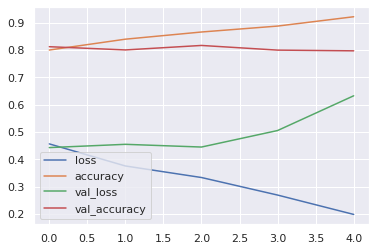

In [ ]:
pd.DataFrame(history_model_6.history).plot()

# Model 7

In [ ]:
data_10 = data[['text','target']].sample(frac=.1, random_state=42)

In [ ]:
data_10.shape

(761, 2)

In [ ]:
model_7 = tf.keras.models.Sequential()
model_7.add(embed)
model_7.add(tf.keras.layers.Dense(64, activation="relu"))
model_7.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_7.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=.002), metrics=["accuracy"])

In [ ]:
history_model_7 = model_7.fit(data_10['text'], data_10['target'],
                              epochs = 6,
                              validation_data=(data['text'], data['target']),
                              callbacks = [create_tensorboard_callback("tensorboard",
                                                                       "model_7")])

Saving TensorBoard log files to: tensorboard/model_7/20210803-132647
Epoch 1/6
24/24 [==============================] - 4s 153ms/step - loss: 0.6402 - accuracy: 0.7175 - val_loss: 0.5679 - val_accuracy: 0.7898
Epoch 2/6
24/24 [==============================] - 3s 122ms/step - loss: 0.4976 - accuracy: 0.8042 - val_loss: 0.4718 - val_accuracy: 0.7917
Epoch 3/6
24/24 [==============================] - 2s 97ms/step - loss: 0.4131 - accuracy: 0.8187 - val_loss: 0.4464 - val_accuracy: 0.7935
Epoch 4/6
24/24 [==============================] - 2s 93ms/step - loss: 0.3680 - accuracy: 0.8371 - val_loss: 0.4404 - val_accuracy: 0.8013
Epoch 5/6
24/24 [==============================] - 2s 89ms/step - loss: 0.3383 - accuracy: 0.8555 - val_loss: 0.4435 - val_accuracy: 0.7940
Epoch 6/6
24/24 [==============================] - 3s 120ms/step - loss: 0.3175 - accuracy: 0.8686 - val_loss: 0.4494 - val_accuracy: 0.7921


In [ ]:
model_7.evaluate(x_test, y_test)

48/48 [==============================] - 0s 9ms/step - loss: 0.4735 - accuracy: 0.7768


[0.47345519065856934, 0.7767564058303833]

In [ ]:
model_7.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_11 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


# Finding the most incorrect with highest probability

In [ ]:
probs = np.asarray(model_7.predict(x_test))

In [ ]:
sq_probs = tf.squeeze(probs)

In [ ]:
tf.squeeze(probs.shape), y_test.shape

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1523,    1], dtype=int32)>,
 (1523,))

In [ ]:
probs_comp = pd.DataFrame({"Statement":x_test, "True":y_test, "Prediction":sq_probs})

In [ ]:
sorted_prob_comparision = probs_comp.sort_values("Prediction", ascending=False)

In [ ]:
sorted_prob_comparision[sorted_prob_comparision["True"]==0].head(10)

,Statement,True,Prediction
881,@adorableappple No reported flooding po in the...,0,0.977900
1363,Governor weighs parole for California school b...,0,0.967232
769,Weapons stolen from National Guard Armory in N...,0,0.948488
31,? High Skies - Burning Buildings ? http://t.co...,0,0.945232
759,FedEx will no longer transport bioterror patho...,0,0.939384
805,Fire hazard associated with installation of no...,0,0.938148
813,Aug. 5: The Fort Calhoun Nuclear Station is at...,0,0.933387
48,Cyclists it is pandemonium on the roads today....,0,0.931525
567,@RebeccaforReal accepts Wisconsin Emergency Re...,0,0.931216
393,@SonofLiberty357 all illuminated by the bright...,0,0.922653


In [ ]:
sorted_prob_comparision[sorted_prob_comparision["True"]==0]["Statement"][567]

'@RebeccaforReal accepts Wisconsin Emergency Response Plan on behalf of @GovWalker #nbc15 http://t.co/Pis0aiVRbR'